<a href="https://colab.research.google.com/github/Yashwanth1565/ExceLR/blob/main/NER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### Names Entity Recognition

In [2]:
sent="Yash is studying at Malla Reddy University in Hyderbad,India."

In [3]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [4]:
!pip install svgling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 2.0 MB/s eta 0:00:00


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.


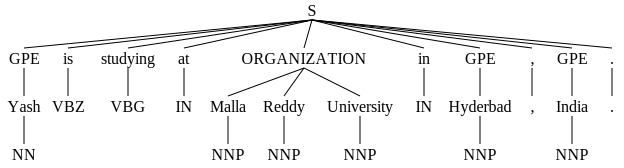

In [5]:
import nltk
from nltk import ne_chunk
from nltk import word_tokenize
from nltk import pos_tag
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')
ne_chunk(nltk.pos_tag(word_tokenize(sent)),binary=False)

In [6]:
import spacy
nlp=spacy.load('en_core_web_sm')
doc=nlp(u'Apple is ready to launch new phone worth of $10000 in New York Times')
for ent in doc.ents:
    print(ent.text,ent.start_char,ent.end_char,ent.label_)

Apple 0 5 ORG
10000 45 50 MONEY
New York Times 54 68 ORG


In [7]:
### https://github.com/Yashwanth1565/ExceLR/blob/main/NER.ipynb

In [8]:
!pip install spacy

In [9]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 28.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [10]:
import spacy
nlp=spacy.load('en_core_web_sm')
doc=nlp(u'Apple is read yto launch its new phone worth of $10000 in New York Times.')
for ent in doc.ents:
    print(ent.text,ent.start,ent.end_char,ent.label)

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


Apple 0 5 383
10000 11 54 394
New York Times 13 72 383


In [11]:
import spacy
nlp=spacy.load('en_core_web_sm')
doc = nlp(u"Elon Musk,the CEO of SpaceX and Tesla, announced that SpaceX's StarShip will be launched  its first crewed mission to march in 2027The mission, which will involve austronauts from NASA,will be the firsat of its kind,and it will takes place at Kennedy Space Center in Florida. Musk emphasized that the project would push the boundaries of space exploration...")
for ent in doc.ents:
    print(f"Entity:{ent.text},{ent.start_char},{ent.end_char},Label:{ent.label}")

Entity:Elon Musk,0,9,Label:380
Entity:SpaceX,21,27,Label:381
Entity:Tesla,32,37,Label:383
Entity:first,94,99,Label:396
Entity:2027The,127,134,Label:384
Entity:NASA,180,184,Label:383
Entity:Kennedy Space Center,243,263,Label:9191306739292312949
Entity:Florida,267,274,Label:384


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv('/content/Reviews.csv',nrows=100)
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      100 non-null    int64 
 1   ProductId               100 non-null    object
 2   UserId                  100 non-null    object
 3   ProfileName             100 non-null    object
 4   HelpfulnessNumerator    100 non-null    int64 
 5   HelpfulnessDenominator  100 non-null    int64 
 6   Score                   100 non-null    int64 
 7   Time                    100 non-null    int64 
 8   Summary                 100 non-null    object
 9   Text                    100 non-null    object
dtypes: int64(5), object(5)
memory usage: 7.9+ KB


In [17]:
df.Summary.head()

,Summary
0,Good Quality Dog Food
1,Not as Advertised
2,"""Delight"" says it all"
3,Cough Medicine
4,Great taffy


In [21]:
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
nltk.download('stopwords')
nltk.download('wordnet')
df['Text']=df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split() ))
df['Text']=df['Text'].str.replace('[^\w\s]','')
stop=stopwords.words('english')
df['Text']=df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Text']=df['Text'].apply(lambda x: str(TextBlob(x).correct()))
df['Text']=df['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.Text.head();

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


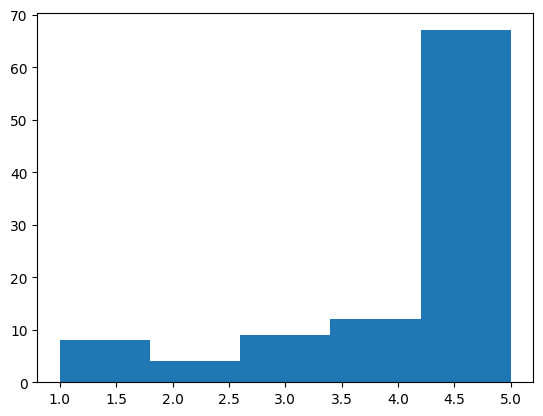

<bound method GroupBy.count of <pandas.core.groupby.generic.SeriesGroupBy object at 0x7f3d1f9beed0>>


In [23]:
reviews=df
reviews.dropna(inplace=True)
reviews.Score.hist(bins=5,grid=False)
plt.show()
print(reviews.groupby('Score').Text.count)

In [25]:
score1=reviews[reviews['Score']==1].sample(n=47, replace=True) #add replace = True, otherwise, there may not be 47 examples of score=1 in the dataset.
score2=reviews[reviews['Score']==2].sample(n=47, replace=True) #add replace = True, otherwise, there may not be 47 examples of score=2 in the dataset.
score3=reviews[reviews['Score']==3].sample(n=47, replace=True) #add replace = True, otherwise, there may not be 47 examples of score=3 in the dataset.
score4=reviews[reviews['Score']==4].sample(n=47, replace=True) #add replace = True, otherwise, there may not be 47 examples of score=4 in the dataset.
score5=reviews[reviews['Score']==5].sample(n=47, replace=True) #add replace = True, otherwise, there may not be 47 examples of score=5 in the dataset.

Score
1    47
2    47
3    47
4    47
5    47
Name: Text, dtype: int64


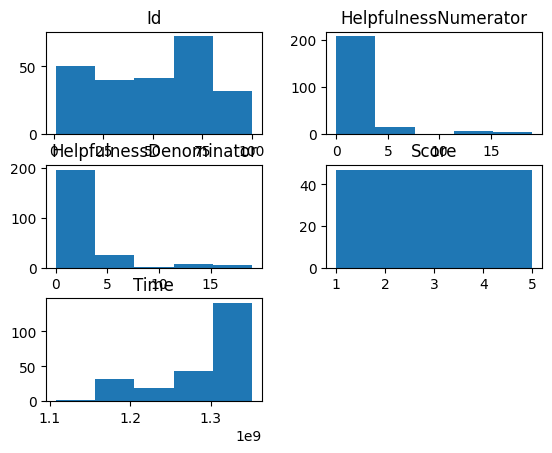

In [34]:
reviews_sample=pd.concat([score1,score2,score3,score4,score5])
reviews_sample.reset_index(drop=True,inplace=True)
reviews_sample.Score.value_counts()
print(reviews_sample.groupby('Score').Text.count())
reviews_sample.hist(bins=5,grid=False)
plt.show()

In [ ]:
x